In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi
import CS

from matplotlib import rc
import seaborn; seaborn.set()

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


%matplotlib inline

In [2]:
f1 = 10. #[Hz]
f2 = 40. #[Hz]
phi1 = pi/5.
phi2 = pi/9.
duration = 10.0
ny_dt = 1.0/(2*(f2+10))
dt = .001 # high sample rate, pretend to be continuous

def sig(t):

    return 50.0*np.sin(2*pi*f1*t + pi*phi1) + \
          100.0*np.sin(2*pi*f2*t + pi*phi2)



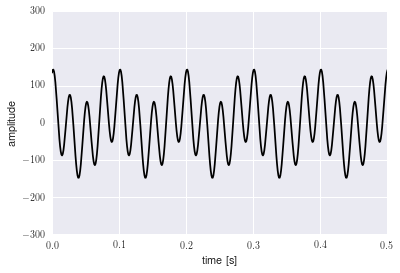

In [3]:
plt.figure()
t = np.arange(0, duration, dt)
xt = sig(t)
plt.plot(t,xt,'k', 
         label='$50\sin(2\pi 10t + \pi/5) + 100\sin(2\pi 40t + \pi/9)$')
plt.xlabel('time [s]');plt.ylabel('amplitude')
plt.xlim(0,.5);plt.ylim(-300,300)
#plt.legend()
plt.savefig('figures/figure1.eps')

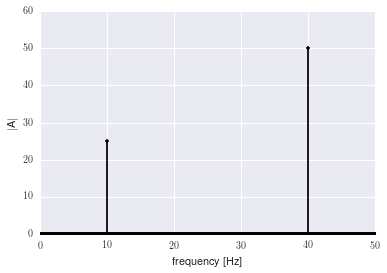

In [4]:
dt = t[1]-t[0]

Xf = np.fft.rfft(xt) / xt.size
f = np.fft.rfftfreq(xt.size, dt)
plt.figure()
plt.stem(f, abs(Xf), basefmt='k-',
        linefmt='k-', markerfmt='k.')
plt.xlabel('frequency [Hz]')
plt.xlim(0,50);plt.ylim(0,60)
plt.ylabel('$|$A$|$')
plt.savefig('figures/figure2.eps')

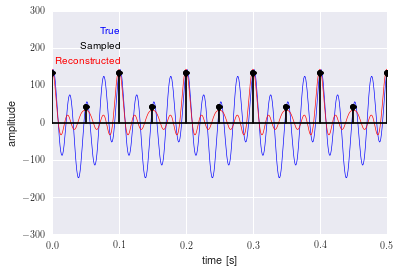

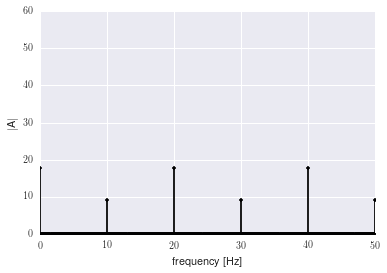

In [5]:
ds_factor = 5
        
t = np.arange(0,duration,dt)        
xt = sig(t)

ny_t = np.arange(0,duration,ny_dt)
x_nyq = sig(ny_t)

xn = np.zeros(x_nyq.size)
xn[::ds_factor] = sig(ny_t[::ds_factor])

Xfn = (np.fft.rfft(xn))/xn.size
fn = np.fft.rfftfreq(xn.size, ny_dt)

# zero pad for recon
reconF = np.zeros(xt.size/2 +1, dtype=np.complex64)
reconF[:Xfn.size] = Xfn
recon = np.real(np.fft.irfft(reconF))

plt.figure()

plt.plot(t, xt, 'b-', linewidth=.65,)
plt.plot(t, recon*xt.size,'r-', linewidth=.65)


plt.stem(ny_t[::ds_factor],x_nyq[::ds_factor],
                     basefmt='k-',
                     linefmt='k-', markerfmt='ko')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend()


plt.xlim([0,.5])
plt.ylim([-300,300])

plt.xlabel('time [s]');plt.ylabel('amplitude')
plt.annotate('True', xy=(.1, 260),  xycoords='data',
            xytext=(0.1, 260), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='blue'
            )
plt.annotate('Reconstructed', xy=(.1, 180),  xycoords='data',
            xytext=(0.1, 180), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='red'
            )
plt.annotate('Sampled', xy=(.1, 180),  xycoords='data',
            xytext=(0.1, 220), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='black'
            )
plt.savefig('figures/figure3.eps')

plt.figure()


plt.stem(fn, np.abs(Xfn), basefmt='k-',
        linefmt='k-', markerfmt='k.')
plt.xlabel('frequency [Hz]')
plt.ylabel('$|$A$|$');plt.xlim(0,50);plt.ylim(0,60)


plt.savefig('figures/figure4.eps')

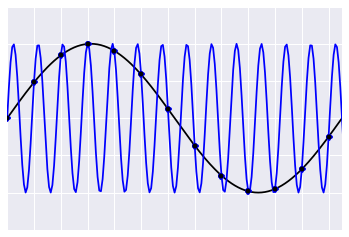

In [6]:
duration = .101
ny = (2000.)/2
t = np.arange(0, duration, 1/(2*ny))
sig1 = np.sin(2*pi*10*t)
sig2 = np.sin(2*pi*(10 + ny/8)*t)
    
fig = plt.figure()
ax  = fig.add_subplot(111)
#ax.set_position([0.1,0.1,0.8,0.8])
ax.plot(t, sig1, 'k', label='$\sin(2\pi10t)$');plt.xlim(0,.1)
ax.plot(t, sig2, 'b', label='$\sin(2\pi135t)$')
#ax.set_xlabel('time [s]'); ax.set_ylabel('amplitude')
samples = np.arange(0, duration, 1/(ny/8))

ax.plot(samples,np.sin(2*pi*(10 + ny/8)*samples), 'ko',
        color="b")

ax.plot(samples,np.sin(2*pi*10*samples), 'ko',color='k',markersize=5)

ax.set_xticks(samples, minor=False)
ax.set_yticklabels([]);ax.set_xticklabels([])
ax.xaxis.grid(which='minor')

ax.set_ylim(-1.5,1.5)
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('figures/figure5.eps')

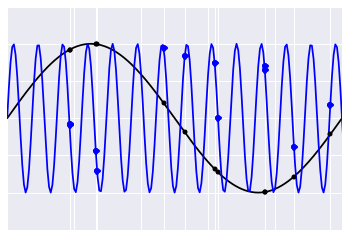

In [7]:
duration = 0.101
    
plt.figure()
ny = (2000.)/2
t = np.arange(0, duration, 1/(2*ny))
sig1 = np.sin(2*pi*10*t)
sig2 = np.sin(2*pi*(10 + ny/8)*t)
plt.plot(t, sig1, 'k');plt.xlim(0,.1)
plt.plot(t, sig2, 'b')
        
samples = np.random.random_sample(duration*(ny/8))*duration
        

plt.plot(samples,np.sin(2*pi*(10 + ny/8)*samples), 'ko',
         color='b')
plt.plot(samples,np.sin(2*pi*10*samples), 'ko',markersize=5)

#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().set_xticks(samples, minor=True)
plt.ylim(-1.5,1.5)

plt.gca().xaxis.grid(which='minor')
plt.gca().set_yticklabels([]);plt.gca().set_xticklabels([])
#plt.xlabel('time [s]');plt.ylabel('amplitude [arbitrary units]')
plt.savefig('figures/figure6.eps')

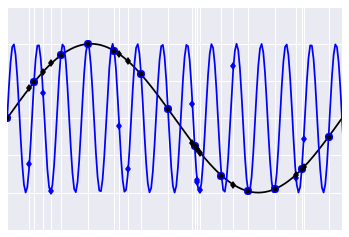

In [8]:
duration = .101
ny = (2000.)/2
t = np.arange(0, duration, 1/(2*ny))
sig1 = np.sin(2*pi*10*t)
sig2 = np.sin(2*pi*(10 + ny/8)*t)
    
fig = plt.figure()
ax  = fig.add_subplot(111)
#ax.set_position([0.1,0.1,0.8,0.8])
ax.plot(t, sig1, 'k', label='$\sin(2\pi10t)$');plt.xlim(0,.1)
ax.plot(t, sig2, 'b', label='$\sin(2\pi135t)$')
#ax.set_xlabel('time [s]'); ax.set_ylabel('amplitude')
samples = np.arange(0, duration, 1/(ny/8))

ax.plot(samples,np.sin(2*pi*(10 + ny/8)*samples), 'ko', markersize=8,
        color="b")

ax.plot(samples,np.sin(2*pi*10*samples), 'ko',color='k',markersize=5)

ax.set_xticks(samples, minor=False)
ax.set_yticklabels([]);ax.set_xticklabels([])
ax.xaxis.grid(which='minor')

ax.set_ylim(-1.5,1.5)
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

samples = np.random.random_sample(duration*(ny/8))*duration
        
plt.gca().set_xticks(samples, minor=True)
plt.plot(samples,np.sin(2*pi*(10 + ny/8)*samples), 'kd', markersize=6,
         color='b')
plt.plot(samples,np.sin(2*pi*10*samples), 'kd',markersize=6, color='k')

plt.savefig('figures/figure_test.eps')

(-300, 300)

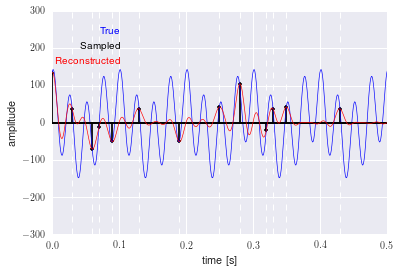

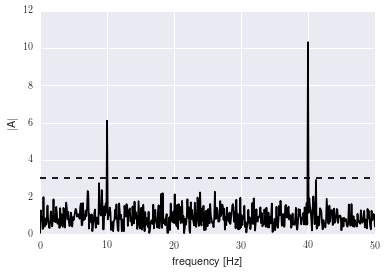

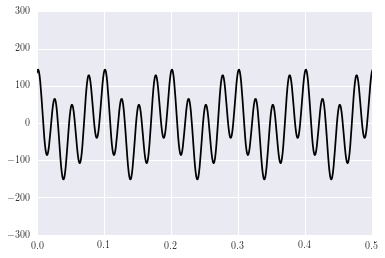

In [9]:
ds_factor = 5
duration = 10.       
t = np.arange(0,duration,dt)
xt = sig(t)

ny_t = np.arange(0,duration,ny_dt)
x_nyq = sig(ny_t)
samples = np.random.choice(range(ny_t.size), int(ny_t.size/ds_factor),
                replace=False)
        
xn = np.zeros(x_nyq.size)
xn[samples] = sig(ny_t[samples])
        
Xfn = np.fft.rfft(xn)*ds_factor / xn.size
fn = np.fft.rfftfreq(xn.size, ny_dt)

reconF = np.zeros(xt.size/2 +1, dtype=np.complex64)
reconF[:Xfn.size] = Xfn
recon = np.real(np.fft.irfft(reconF))*xt.size/ds_factor

plt.figure()
plt.stem(ny_t[samples], xn[samples],
         basefmt='k-',linefmt='k-', markerfmt='k.',
         label='samples')

plt.plot(t, xt, 'b', linewidth=.65)
plt.ylim(-200,200)
plt.plot([0,1], [0,0],'k')
plt.plot(t, recon[:recon.size],'r', linewidth=.65)
plt.ylim(-300,300)

plt.gca().set_xticks(ny_t[samples], minor=True)
plt.gca().xaxis.grid(which='minor',linestyle='--')
plt.xlim([0,.5])
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.annotate('True', xy=(.1, 260),  xycoords='data',
            xytext=(0.1, 260), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='blue'
            )
plt.annotate('Sampled', xy=(.1, 180),  xycoords='data',
            xytext=(0.1, 220), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='k'
            )
plt.annotate('Reconstructed', xy=(.1, 180),  xycoords='data',
            xytext=(0.1, 180), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
             color='r'
            )
plt.xlabel('time [s]');plt.ylabel('amplitude')
plt.savefig('figures/figure7.eps')

plt.figure()
plt.plot(fn,abs(Xfn)/ds_factor, 'k')
plt.xlabel('frequency [Hz]')
plt.ylabel('$|$A$|$')
plt.plot([0,50], [3,3], 'k--')
plt.savefig('figures/figure8.eps')


reconF = np.zeros(xt.size/2 +1, dtype=np.complex64)
reconF[:Xfn.size] = Xfn

reconF[np.abs(reconF/ds_factor) < 3]*=0
recon = np.real(np.fft.irfft(reconF))


energy = np.sqrt(np.sum(xt**2))
recon = (recon/np.sqrt(np.sum(recon**2)))*energy

plt.figure()
plt.plot(t,recon,'k');plt.xlim([0,.5]); plt.ylim(-300,300)


$x(t) = 50\sin(2\pi 10t + \pi/5) + 100\sin(2\pi 40t + \pi/9)$